In [ ]:
import pandas as pd

In [103]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import pickle

In [104]:
data = pd.read_csv("Credit Card Transactions.csv")

In [105]:
data.shape

(5000, 23)

In [106]:
data.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [107]:
data = data.drop(['Customer_ID', 'Count'], axis=1)
data.columns

Index(['Status_Checking_Acc', 'Duration_in_Months', 'Credit_History',
       'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc',
       'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

In [108]:
data[data==0].count()

Status_Checking_Acc               0
Duration_in_Months                0
Credit_History                    0
Purposre_Credit_Taken             0
Credit_Amount                     0
Savings_Acc                       0
Years_At_Present_Employment       0
Inst_Rt_Income                    0
Marital_Status_Gender             0
Other_Debtors_Guarantors          0
Current_Address_Yrs               0
Property                          0
Age                               0
Other_Inst_Plans                  0
Housing                           0
Num_CC                            0
Job                               0
Dependents                        0
Telephone                         0
Foreign_Worker                    0
Default_On_Payment             3505
dtype: int64

In [109]:
data.isnull().sum()

Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
dtype: int64

In [110]:
data['Default_On_Payment'].value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

In [111]:
li = list(data[data.Default_On_Payment == 0][:2000].index)

In [112]:
data = data.drop(data.index[li])

data['Default_On_Payment'].value_counts()

0    1505
1    1495
Name: Default_On_Payment, dtype: int64

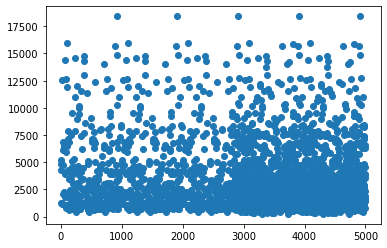

In [113]:
import matplotlib.pyplot as plt
plt.scatter(data.index, data['Credit_Amount'])

In [114]:
li = list(data['Credit_Amount'].sort_values()[-5:].index)

In [115]:
data['Credit_Amount'][li] = int(data.drop(li)['Credit_Amount'].mean())

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


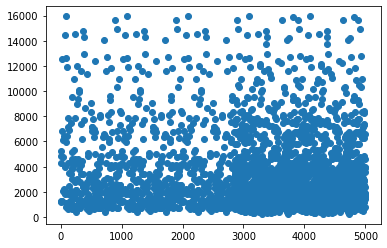

In [116]:
plt.scatter(data.index, data['Credit_Amount'])

In [117]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,1
10,A12,12,A32,A40,1295,A61,A72,3,A92,A101,...,A123,25,A143,A151,1,A173,1,A191,A201,1
11,A11,48,A32,A49,4308,A61,A72,3,A92,A101,...,A122,24,A143,A151,1,A173,1,A191,A201,1
13,A11,24,A34,A40,1199,A61,A75,4,A93,A101,...,A123,60,A143,A152,2,A172,1,A191,A201,1


In [118]:
data.reset_index(drop=True,inplace=True)

In [119]:
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [120]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1
1,1,30,4,0,5234,0,0,4,3,0,...,2,28,2,1,2,3,1,0,0,1
2,1,12,2,0,1295,0,1,3,1,0,...,2,25,2,0,1,2,1,0,0,1
3,0,48,2,9,4308,0,1,3,1,0,...,1,24,2,0,1,2,1,0,0,1
4,0,24,4,0,1199,0,4,4,2,0,...,2,60,2,1,2,1,1,0,0,1


In [121]:
X = data.drop(['Default_On_Payment'], axis=1)
y = data['Default_On_Payment']

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X)

pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns).sort_values()

C:\Users\welcome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Other_Inst_Plans                1.041390
Foreign_Worker                  1.063307
Other_Debtors_Guarantors        1.068055
Marital_Status_Gender           1.073392
Purposre_Credit_Taken           1.080934
Dependents                      1.100138
Savings_Acc                     1.100338
Status_Checking_Acc             1.163022
Current_Address_Yrs             1.189431
Years_At_Present_Employment     1.202401
Num_CC                          1.230243
Inst_Rt_Income                  1.277116
Credit_History                  1.282693
Age                             1.298316
Telephone                       1.308253
Housing                         1.320576
Job                             1.322557
Property                        1.399278
Duration_in_Months              1.816407
Credit_Amount                   2.156385
const                          57.027793
dtype: float64

In [129]:
len(X.columns)

20

count=1
j=21
for i in X.columns:
    
    if j>=10:
        plt.figure(figsize=(4,5))
        plt.subplot(440+count)
        plt.scatter(X.index,X[i])
        plt.xlabel("Index data")
        plt.ylabel(x[i])
        j-=1
    
        count+=1
    elif j<10:
        plt.figure(figsize=(4,5))
        plt.subplot(440+count)
        plt.scatter(X.index,X[i])
        plt.xlabel("Index data")
        plt.ylabel(x[i])
        j-=1
        count+=1
    else:
        print("It is limit exceeded")
        
        


21

In [98]:
x=X.drop(["Credit_Amount","Age"],axis=1)

In [99]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in x.columns:
    dfObserved = pd.crosstab(x[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = p

Significance.sort_values()

Status_Checking_Acc            5.208487e-99
Credit_History                 5.418514e-43
Duration_in_Months             6.273649e-40
Savings_Acc                    2.631320e-30
Purposre_Credit_Taken          3.159255e-23
Property                       1.338958e-18
Housing                        1.013644e-14
Years_At_Present_Employment    1.526597e-12
Other_Inst_Plans               2.213593e-10
Foreign_Worker                 5.177730e-08
Marital_Status_Gender          1.213405e-06
Other_Debtors_Guarantors       1.501810e-05
Inst_Rt_Income                 2.356941e-04
Num_CC                         1.943472e-02
Telephone                      4.369767e-02
Job                            1.215605e-01
Current_Address_Yrs            5.005178e-01
Dependents                     7.088743e-01
dtype: float64

In [101]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in x.columns:
    dfObserved = pd.crosstab(x[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = (1-p)*100

Significance.sort_values()

Dependents                      29.112566
Current_Address_Yrs             49.948220
Job                             87.843945
Telephone                       95.630233
Num_CC                          98.056528
Inst_Rt_Income                  99.976431
Other_Debtors_Guarantors        99.998498
Marital_Status_Gender           99.999879
Foreign_Worker                  99.999995
Other_Inst_Plans               100.000000
Years_At_Present_Employment    100.000000
Housing                        100.000000
Savings_Acc                    100.000000
Property                       100.000000
Purposre_Credit_Taken          100.000000
Credit_History                 100.000000
Duration_in_Months             100.000000
Status_Checking_Acc            100.000000
dtype: float64

In [137]:
import scipy.stats as stats

xz=X[["Age","Credit_Amount"]]
for i in xz.columns:
    print(stats.f_oneway(xz[i],y),i)

F_onewayResult(statistic=28078.280266828842, pvalue=0.0) Age
F_onewayResult(statistic=3963.933455894043, pvalue=0.0) Credit_Amount


In [138]:
X.drop(["Dependents","Current_Address_Yrs","Job","Telephone","Num_CC"],inplace=True,axis=1)

In [139]:
lg=LogisticRegression()

In [140]:
train_x,test_x,train_y,test_y=train_test_split(X,y,random_state=1,train_size=0.5)

In [141]:
lg.fit(train_x,train_y)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
pred=lg.predict(test_x)

In [143]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [144]:
accuracy_score(test_y,pred)*100

73.2

In [145]:
confusion_matrix(pred,test_y)

array([[560, 199],
       [203, 538]], dtype=int64)

In [146]:
lg.predict_proba(test_x)[:,1]

array([0.14802742, 0.71624616, 0.16511452, ..., 0.21517538, 0.70179387,
       0.73017059])

In [147]:
Accuracy=(560+538)/(560+538+199+203)
Accuracy

0.732

In [148]:
data.index

RangeIndex(start=0, stop=3000, step=1)